In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

In [2]:
# Example 1 - Book Sales Data

In [3]:
df = pd.read_csv("book_sales.csv", index_col="Date", parse_dates=["Date"]).drop("Paperback", axis=1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [4]:
df["Time"] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


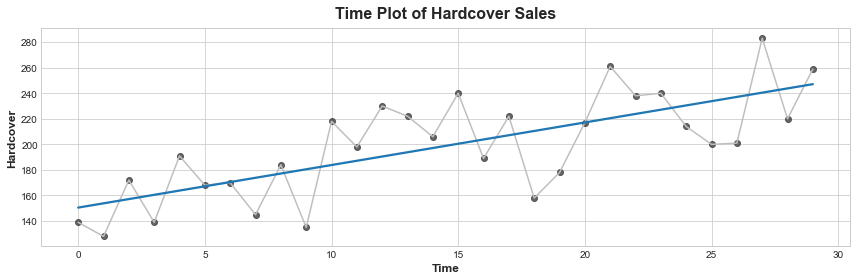

In [5]:
plt.rc("figure", autolayout=True, figsize=(12, 4), titlesize=18, titleweight='bold')
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=16, titlepad=10,)

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [6]:
df["Lag_1"] = df["Hardcover"].shift(1)
df.head()

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0


In [7]:
df = df.reindex(columns=["Hardcover", "Lag_1", "Time"])
df.head()

,Hardcover,Lag_1,Time
Date,,,
2000-04-01,139,NaN,0
2000-04-02,128,139.0,1
2000-04-03,172,128.0,2
2000-04-04,139,172.0,3
2000-04-05,191,139.0,4


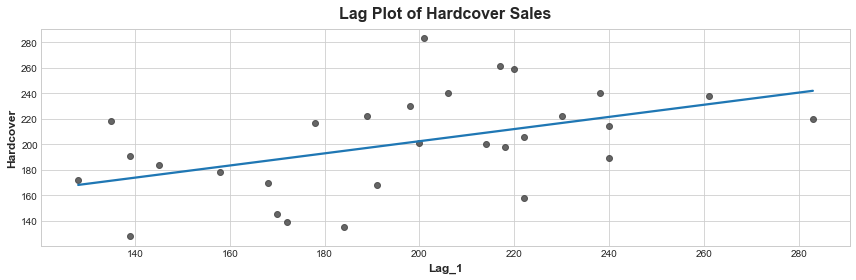

In [8]:
fig, ax = plt.subplots()
# ax.plot('Lag_1', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Lag Plot of Hardcover Sales');

In [9]:
# Example 2 - Tunnel Traffic Data

In [10]:
tunnel = pd.read_csv("tunnel.csv", index_col="Day", parse_dates=["Day"])
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [11]:
df1 = tunnel.copy()
df1["Time"] = np.arange(len(df1.index))

In [12]:
df1.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Training data
X = df1.loc[:, ['Time']] # features
y = df1.loc[:, 'NumVehicles']  # target

In [15]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [17]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

In [18]:
plt.rc("figure", autolayout=True, figsize=(12, 4))
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)
plot_params = dict(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", legend=False)

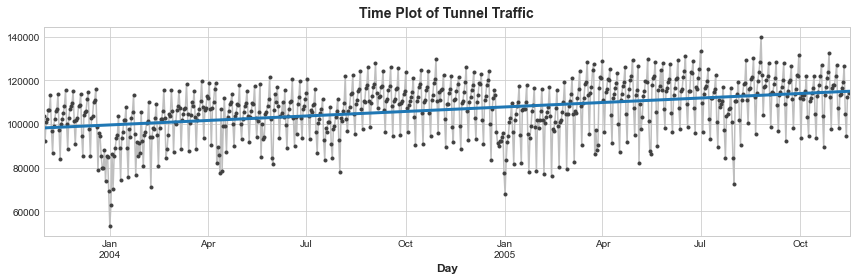

In [19]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [20]:
df1["Lag_1"] = df1["NumVehicles"].shift(1)
df1.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [21]:
X = df1.loc[ :, ["Lag_1"]]
X.dropna(inplace=True) # drop missing values in the feature set
y = df1.loc[ :, "NumVehicles"]  # create the target
y, X = y.align(X, join = "inner") # drop corresponding values in target

In [22]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Freq: D, Length: 746, dtype: float64

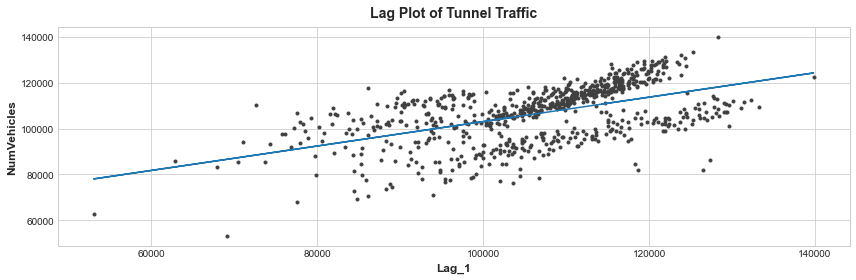

In [24]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

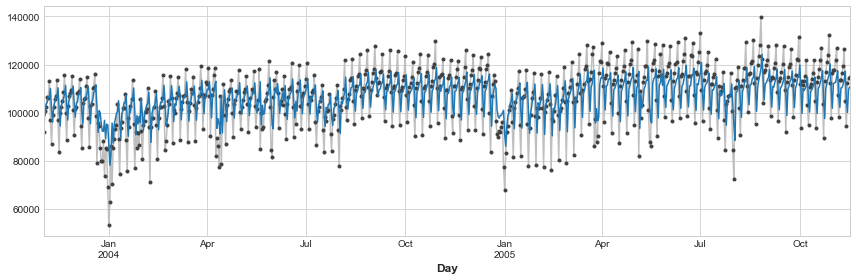

In [25]:
ax = y.plot(**plot_params)
ax = y_pred.plot()